# ECG Data Analysis - WFDB Format

## Dataset Overview
- **Format:** WFDB (WaveForm DataBase)
- **Records:** 659 ECG recordings
- **Type:** 12-lead ECG
- **Sampling Rate:** 500 Hz
- **Duration:** 10 seconds per record
- **Leads:** I, II, III, aVR, aVF, aVL, V1, V2, V3, V4, V5, V6

In [ ]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

## 2. Define File Paths

Set up paths data files

In [2]:
# Define paths
UPLOADS_DIR = Path("mimic-iv-ecg-demo-data")

# Verify paths exist
print(f"Uploads directory exists: {UPLOADS_DIR.exists()}")

Uploads directory exists: True


## 3. Load and Explore the Record Index

Examine record list to see what data we have available

In [3]:
# Load the record list
record_list = pd.read_csv(UPLOADS_DIR / "record_list.csv")

print(f"Total number of ECG records: {len(record_list)}")
print(f"\nNumber of unique patients: {record_list['subject_id'].nunique()}")
print(f"\nFirst 10 records:")
record_list.head(10)

Total number of ECG records: 659

Number of unique patients: 92

First 10 records:


,subject_id,study_id,file_name,ecg_time,path
0,10000032,107143276,107143276,2180-07-23 08:44:24,files/p10000032/s107143276/107143276
1,10000032,102511170,102511170,2180-08-06 09:07:36,files/p10000032/s102511170/102511170
2,10000032,100780919,100780919,2180-07-23 09:54:32,files/p10000032/s100780919/100780919
3,10001217,105362569,105362569,2157-11-18 18:26:02,files/p10001217/s105362569/105362569
4,10001217,102172660,102172660,2157-11-20 09:08:38,files/p10001217/s102172660/102172660
5,10001725,102147240,102147240,2110-06-08 14:39:12,files/p10001725/s102147240/102147240
6,10002428,104430624,104430624,2156-04-20 09:31:52,files/p10002428/s104430624/104430624
7,10002428,102144047,102144047,2152-12-13 14:34:52,files/p10002428/s102144047/102144047
8,10002428,106959793,106959793,2156-04-14 08:21:12,files/p10002428/s106959793/106959793
9,10002428,106183809,106183809,2156-04-30 20:50:58,files/p10002428/s106183809/106183809


In [4]:
# Get basic statistics
print("Records per patient:")
records_per_patient = record_list.groupby('subject_id').size()
print(f"Mean: {records_per_patient.mean():.1f}")
print(f"Median: {records_per_patient.median():.0f}")
print(f"Max: {records_per_patient.max()}")
print(f"Min: {records_per_patient.min()}")

Records per patient:
Mean: 7.2
Median: 5
Max: 52
Min: 1


In [5]:
record_list[record_list['study_id'] != record_list['file_name'] ]

,subject_id,study_id,file_name,ecg_time,path


## 4. Reading a Single ECG Record

Read one ECG record and examine its structure

In [6]:
# Select first record to analyze
file_path = record_list['path'][0]
print(file_path)

# Read the record
record_path = UPLOADS_DIR / file_path
record = wfdb.rdrecord(str(record_path))

print("Record loaded successfully!")
print(f"Record name: {record.record_name}")

files/p10000032/s107143276/107143276
Record loaded successfully!
Record name: 107143276


## 5. Explore Record Metadata

Examine metadata stored in the header file

In [7]:
# Display metadata
print("="*60)
print("ECG RECORD INFORMATION")
print("="*60)
print(f"Record name: {record.record_name}")
print(f"Sampling frequency: {record.fs} Hz")
print(f"Duration: {record.sig_len / record.fs:.2f} seconds")
print(f"Number of samples: {record.sig_len}")
print(f"Number of signals (leads): {record.n_sig}")
print(f"\nSignal names: {', '.join(record.sig_name)}")
print(f"Units: {', '.join(record.units)}")

if hasattr(record, 'comments') and record.comments:
    print(f"\nComments:")
    for comment in record.comments:
        print(f"  {comment}")

ECG RECORD INFORMATION
Record name: 107143276
Sampling frequency: 500 Hz
Duration: 10.00 seconds
Number of samples: 5000
Number of signals (leads): 12

Signal names: I, II, III, aVR, aVF, aVL, V1, V2, V3, V4, V5, V6
Units: mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, mV

Comments:
  <subject_id>: 10000032


## 6. Access the Signal Data


In [8]:
# Access the signal data
signals = record.p_signal

print(f"Signal data shape: {signals.shape}")
print(f"  - Rows (samples): {signals.shape[0]}")
print(f"  - Columns (leads): {signals.shape[1]}")
print(f"Data type: {signals.dtype}")

# Show first few samples
df_preview = pd.DataFrame(signals, columns=record.sig_name)
df_preview

Signal data shape: (5000, 12)
  - Rows (samples): 5000
  - Columns (leads): 12
Data type: float64


,I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6
0,-0.155,0.01,0.150,0.070,0.075,-0.140,0.040,0.040,0.010,0.040,0.080,0.020
1,-0.170,0.01,0.165,0.075,0.085,-0.160,0.055,0.055,0.020,0.030,0.080,0.020
2,-0.170,0.00,0.155,0.080,0.075,-0.155,0.060,0.055,0.030,0.025,0.080,0.010
3,-0.170,0.00,0.155,0.080,0.075,-0.155,0.055,0.055,0.030,0.020,0.080,0.010
4,-0.170,0.00,0.155,0.080,0.075,-0.155,0.050,0.055,0.030,0.020,0.080,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.050,0.01,0.045,0.015,0.025,-0.040,-0.005,0.010,-0.030,-0.015,-0.010,-0.190
4996,-0.045,0.01,0.040,0.015,0.020,-0.035,-0.010,0.000,-0.040,-0.020,-0.015,-0.195
4997,-0.045,0.01,0.040,0.015,0.020,-0.035,-0.020,-0.015,-0.045,-0.020,-0.020,-0.200
4998,-0.055,0.00,0.040,0.025,0.015,-0.040,-0.010,-0.015,-0.045,-0.020,-0.020,-0.200


In [9]:
df_preview.describe().T

,count,mean,std,min,25%,50%,75%,max
I,5000.0,0.009616,0.073294,-0.170,-0.045,0.0,0.06500,0.280
II,5000.0,0.035318,0.148444,-0.200,-0.055,0.0,0.08625,0.795
III,5000.0,0.010704,0.133413,-0.275,-0.075,0.0,0.08000,0.635
aVR,5000.0,-0.025098,0.095355,-0.510,-0.055,0.0,0.03500,0.130
aVF,5000.0,0.017944,0.136182,-0.235,-0.070,0.0,0.07000,0.690
aVL,5000.0,0.007176,0.078390,-0.260,-0.045,0.0,0.06500,0.205
V1,5000.0,-0.031452,0.188125,-1.040,-0.025,0.0,0.05000,0.215
V2,5000.0,0.008828,0.230525,-0.935,-0.055,0.0,0.08000,0.545
V3,5000.0,0.096462,0.311933,-0.975,-0.055,0.0,0.15000,0.975
V4,5000.0,0.107766,0.349225,-0.665,-0.060,0.0,0.12500,1.895


## 8. Visualize All 12 Leads

Plot all ECG leads on a line plot

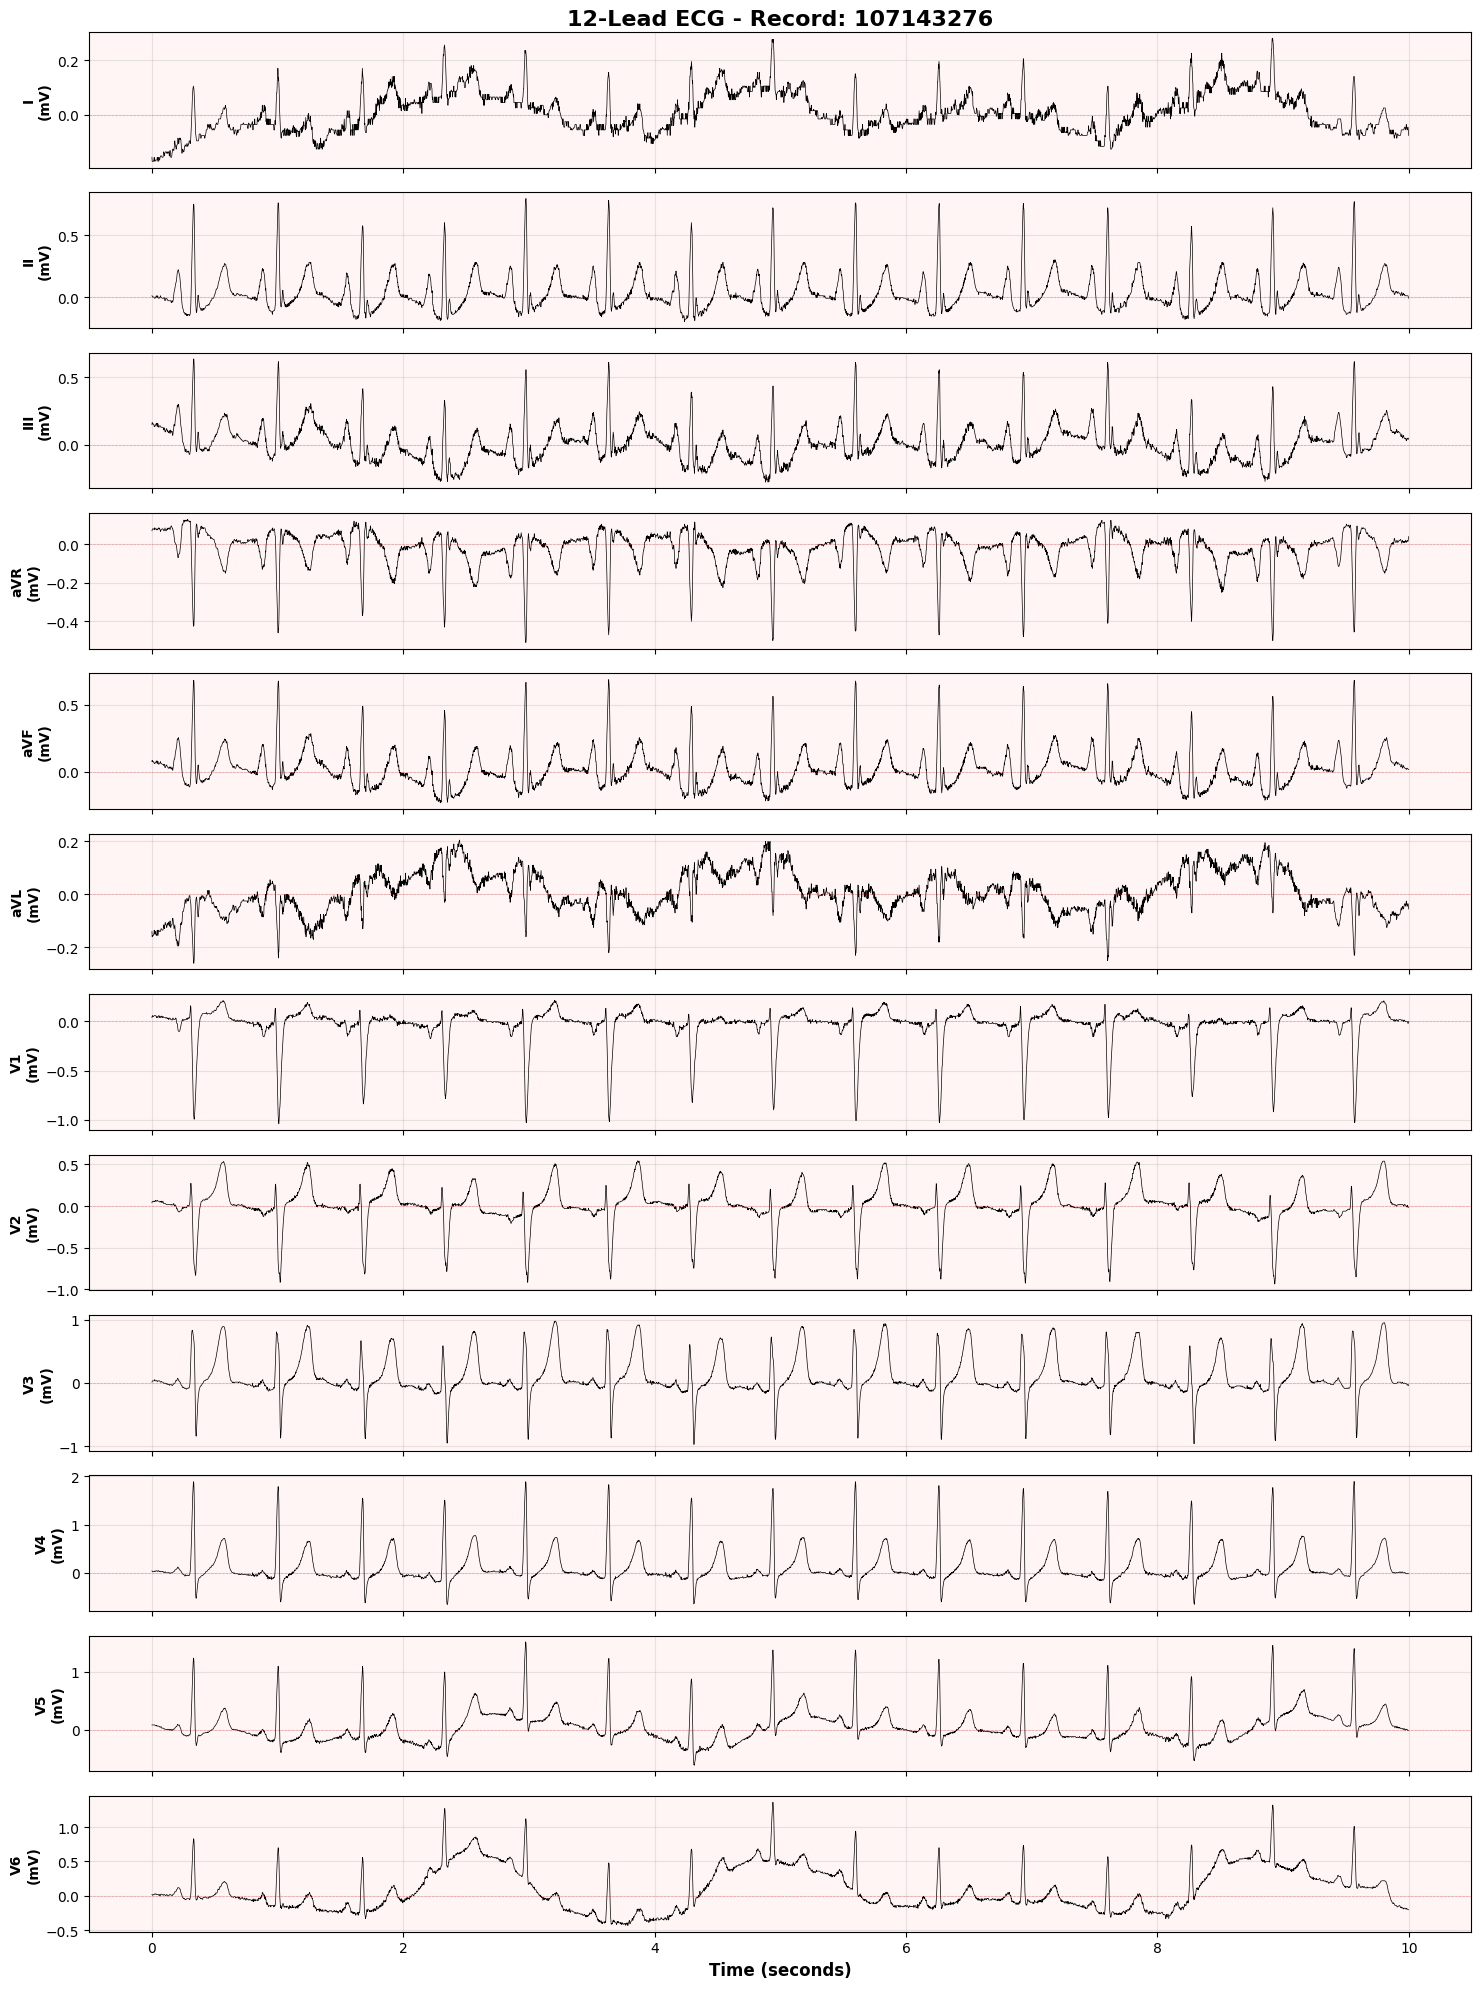

In [10]:
# Create time column
df_preview['time'] = np.arange(len(df_preview)) / record.fs

# Create figure with all 12 leads
fig, axes = plt.subplots(12, 1, figsize=(15, 20), sharex=True)

for i, (ax, name) in enumerate(zip(axes, record.sig_name)):
    df_preview.plot(x='time', y=name, ax=ax, linewidth=0.5, color='black', legend=False)
    ax.set_ylabel(f'{name}\n(mV)', fontsize=10, fontweight='bold')
    ax.set_xlabel('')  # Remove xlabel from individual plots
    ax.grid(True, alpha=0.3)
    ax.set_facecolor('#fff5f5')
    
    # Add horizontal line at zero
    ax.axhline(y=0, color='red', linestyle='--', linewidth=0.5, alpha=0.3)

axes[0].set_title(f'12-Lead ECG - Record: {record.record_name}', fontsize=16, fontweight='bold', pad=5)
axes[-1].set_xlabel('Time (seconds)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

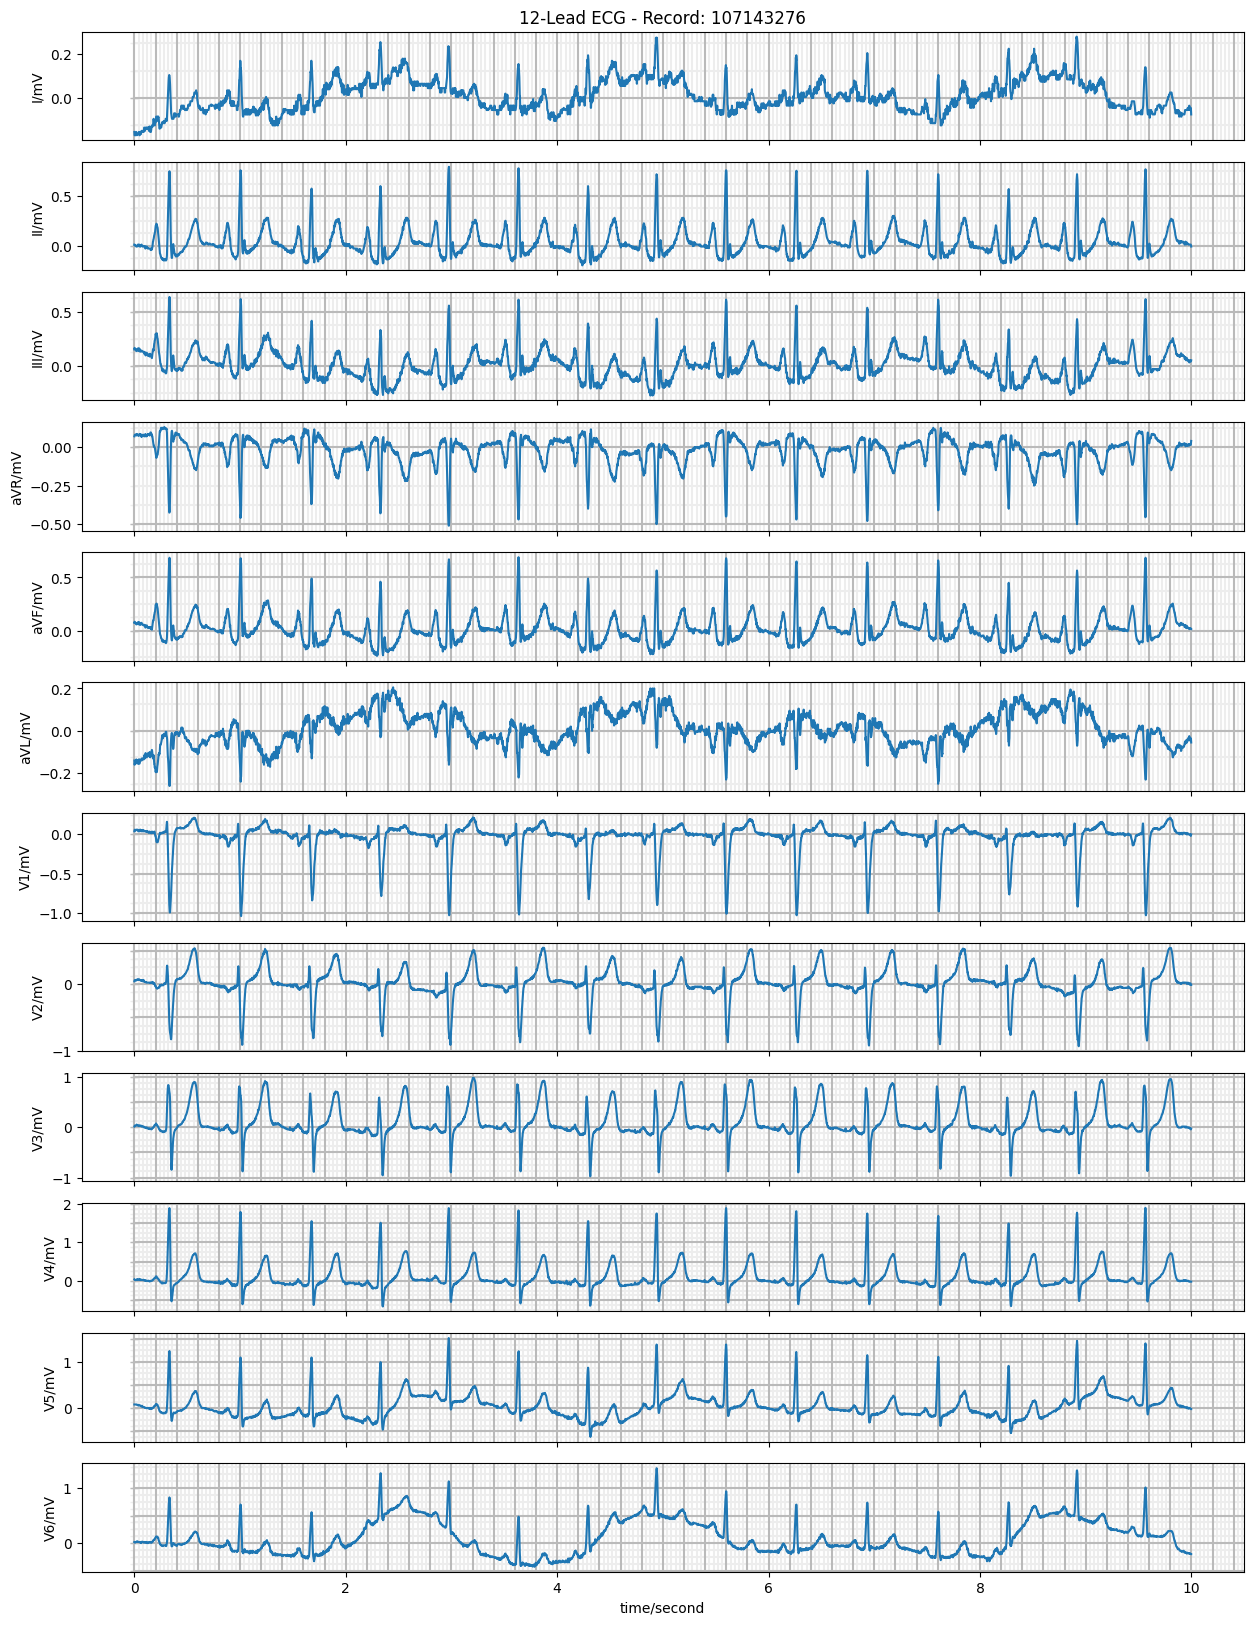

In [13]:
wfdb.plot_wfdb(record=record, figsize=(15, 20), title=f'12-Lead ECG - Record: {record.record_name}', ecg_grids='all')